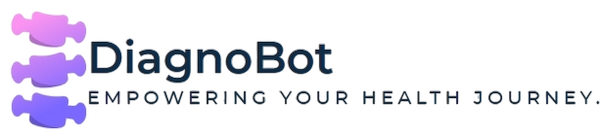

DiagnoBot is an AI-powered medical assistant designed to provide reliable health information based on the rich content of "The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf". Developed as a side project of EarlyMed, DiagnoBot leverages state-of-the-art natural language processing techniques to interpret and respond to medical queries.

### **How It Works**
**1. Document Ingestion and Processing**

- **PDF Source:** The project uses the comprehensive medical reference, The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf, which is placed in the root directory.
- **Text Extraction:** The PDF is loaded using PyPDFLoader, and its content is extracted and then split into smaller chunks (500 characters per chunk with a 50-character overlap) for efficient processing.

**2. Building the Knowledge Base**

- **Embedding Generation:** Each text chunk is converted into vector embeddings using the updated HuggingFaceEmbeddings (powered by the "sentence-transformers/all-MiniLM-L6-v2" model).
- **Vector Storage:** These embeddings are stored in a vector database (ChromaDB), enabling fast and accurate retrieval of relevant information when a user poses a query.

**3. Query Processing and Response Generation**

- **Retrieval QA Chain:** When a user submits a medical question, DiagnoBot uses LangChain's retrieval-based question-answering chain. The system retrieves the most relevant text segments from ChromaDB based on the query context.

- **Language Model:** An LLM, powered by ChatGroq and based on the Llama-3.3-70B model, generates a response by combining the retrieved information with its own language understanding.

- **Prompt Template:** A custom prompt instructs the model to act as a knowledgeable medical assistant, ensuring that the responses are accurate and empathetic.

**4. User Interface**
- **Gradio-Powered Chat Interface:** The chatbot is deployed using Gradio, offering an intuitive web-based interface where users can ask about symptoms, conditions, or treatments and receive immediate, context-aware responses.




In [1]:
!pip install langchain_groq langchain_core langchain_community

In [2]:
!pip install pypdf chromadb sentence-transformers gradio

In [41]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    temperature = 0,
    groq_api_key = "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",
    model_name = "llama-3.3-70b-versatile"
)
res = llm.invoke("Why did Durga die in Pather Panchali? Why was seeing moving train was so important for apu and Durga?")
print(res.content)

In the movie Pather Panchali (1955), directed by Satyajit Ray, Durga, the sister of Apu, dies due to pneumonia. Her death is a pivotal and emotional moment in the film. 

The scene where Apu and Durga see a moving train is significant because it represents their desire for a better life and escape from the poverty and hardships they face in their village. The train symbolizes the outside world, modernity, and the possibility of a more prosperous future. For Apu and Durga, seeing the train is a thrilling experience, as it sparks their imagination and fuels their dreams of a life beyond their rural surroundings.

The train scene is also important because it highlights the bond between Apu and Durga. The two siblings share a special moment, filled with excitement and wonder, as they watch the train pass by. This scene showcases their innocence, curiosity, and shared aspirations.

Durga's death serves as a turning point in the film, as it marks a loss of innocence for Apu and forces him to

In [4]:
!pip install pypdf


In [5]:
!pip install chromadb

In [6]:
!pip install sentence-transformers


In [39]:
import os

pdf_path = "/content/The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf"

if os.path.exists(pdf_path):
    print("PDF File Found")
    print(f"File Size: {os.path.getsize(pdf_path)} bytes")
else:
    print("PDF File Not Found! Please re-upload.")


PDF File Found
File Size: 12226938 bytes


In [8]:
!pip install pypdf


In [9]:
!pip install PyPDF2


In [10]:
from PyPDF2 import PdfReader


In [40]:
from PyPDF2 import PdfReader

pdf_path = "/content/The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf"

try:
    reader = PdfReader(pdf_path)
    print(f"PDF Loaded Successfully. Number of Pages: {len(reader.pages)}")
    print(f"First Page: {reader.pages[0].extract_text()[:500]}")
except Exception as e:
    print("PDF Cannot Be Read:", e)


PDF Loaded Successfully. Number of Pages: 759
First Page: TheGALE
ENCYCLOPEDIA
ofMEDICINE
SECOND EDITION


In [12]:
!pip install -U langchain-huggingface


In [13]:
from langchain_huggingface import HuggingFaceEmbeddings


In [ ]:
from huggingface_hub import login
login(token="HUGGINGFACE_TOKEN")


In [15]:
from langchain.document_loaders import PyPDFLoader
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
import os

def create_db():
    pdf_path = "/content/The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf"
    loader = PyPDFLoader(pdf_path)
    doc = loader.load()

    txt_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    txts = txt_splitter.split_documents(doc)

    embedd = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    call_db = Chroma.from_documents(txts, embedd, persist_directory="/content/chroma_db")
    call_db.persist()

    print("ChromaDB created and data saved!")
    return call_db


In [ ]:
!pip install -U langchain-huggingface
from huggingface_hub import login
login(token="HUGGINGFACE_TOKEN")  # Replace with your actual token


In [ ]:
import os


os.environ["GROQ_API_KEY"] = "Replace_Your_Gloq_API_Key_Here"

def initial_llm():
    llm = ChatGroq(
        temperature=0,
        groq_api_key=os.getenv("GROQ_API_KEY"),
        model_name="llama-3.3-70b-versatile"
    )
    return llm


In [ ]:

!pip install langchain_groq langchain_core langchain_community langchain-huggingface
!pip install pypdf chromadb sentence-transformers

import os
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.document_loaders import PyPDFLoader
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_groq import ChatGroq


def initial_llm():
    llm = ChatGroq(
        temperature=0,
        groq_api_key=os.getenv("Replace_Your_Gloq_API_Key_Here"),
        model_name="llama-3.3-70b-versatile"
    )
    return llm


def create_db():
    pdf_path = "/content/The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf"

    if not os.path.exists(pdf_path):
        raise FileNotFoundError(f"🚨 PDF file not found at: {pdf_path}")

    loader = PyPDFLoader(pdf_path)
    docs = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(docs)


    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


    db_path = "/content/chroma_db"
    vector_db = Chroma.from_documents(texts, embeddings, persist_directory=db_path)
    vector_db.persist()

    print("ChromaDB Created and Data Saved!")
    return vector_db


def setup_qachain(vector_db, llm):
    retriever = vector_db.as_retriever()

    prompt_template = """You are a medical assistant providing accurate and empathetic responses:
    {context}
    User: {question}
    Chatbot: """

    PROMPT = PromptTemplate(template=prompt_template, input_variables=["context", "question"])

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=retriever,
        chain_type_kwargs={"prompt": PROMPT}
    )

    return qa_chain


def main():
    print("Initializing Medical Chatbot...")

    try:
        llm = initial_llm()
        db_path = "/content/chroma_db"

        if not os.path.exists(db_path):
            print("🔄 Creating ChromaDB...")
            vector_db = create_db()
        else:
            print("🔄 Loading Existing ChromaDB...")
            embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
            vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

        qa_chain = setup_qachain(vector_db, llm)


        while True:
            query = input("\nHuman: ")
            if query.lower() == "exit":
                print("Chatbot: Take care! Feel free to ask anytime. Goodbye!")
                break
            response = qa_chain.run(query)
            print(f"Chatbot: {response}")

    except Exception as e:
        print(f" Error: {e}")

if __name__ == "__main__":
    main()


🔄 Initializing Medical Chatbot...
🔄 Loading Existing ChromaDB...

Human: A patient with a history of chronic myeloid leukemia (CML) is being treated with imatinib (a tyrosine kinase inhibitor) but now shows signs of resistance. What could be the molecular reason, and what alternative treatments exist?
Chatbot: I understand that you're concerned about the patient's resistance to imatinib, a tyrosine kinase inhibitor used to treat chronic myeloid leukemia (CML). Resistance to imatinib can occur due to several molecular mechanisms, including:

1. **Point mutations in the BCR-ABL kinase domain**: These mutations can alter the binding site of imatinib, reducing its ability to inhibit the BCR-ABL tyrosine kinase activity.
2. **Amplification of the BCR-ABL gene**: This can lead to overexpression of the BCR-ABL protein, making the leukemia cells less responsive to imatinib.
3. **Activation of alternative signaling pathways**: Leukemia cells can develop alternative signaling pathways that bypas

In [25]:
!pip  install gradio

In [26]:
import os
print(os.listdir())

['.config', 'The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf', 'chroma_db', 'sample_data']


In [27]:
!pip uninstall pandas -y
!pip install --no-cache-dir pandas


Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 127.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 144.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [28]:
!pip install --upgrade jupyter pandas


  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached jupyterlab-4.3.5-py3-none-any.whl.metadata (16 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.15.0-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached jupyter_client-7.4.9-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached json5-0.10.0-py3-none-any.whl.metadata (34 kB)
  Using cached python_json_logger-3.2.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached rfc3339_validator-0.1.4-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached rfc3986_validator-0.1.1-py2.py3-none-any.whl.metadata (1.7 kB)
  U

In [30]:
pip install --upgrade gradio


In [ ]:
import gradio as gr
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os

# Initialize LLM
from langchain_groq import ChatGroq

def initial_llm():
    llm = ChatGroq(
        temperature=0,
        groq_api_key="Replace_Your_Gloq_API_Key_Here",
        model_name="llama-3.3-70b-versatile"
    )
    return llm

def create_db():
    loader = DirectoryLoader("./", glob="*.pdf", loader_cls=PyPDFLoader)
    docs = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(docs)

    embeddings = HuggingFaceBgeEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

    db_path = "./chroma_db"
    vector_db = Chroma.from_documents(texts, embeddings, persist_directory=db_path)
    vector_db.persist()

    print("✅ ChromaDB created and medical data saved!")
    return vector_db

def setup_qachain(vector_db, llm):
    retriever = vector_db.as_retriever()

    prompt_template = """You are DiagnoBot, a medical assistant providing reliable health information:
    {context}
    User: {question}
    Chatbot: """

    PROMPT = PromptTemplate(template=prompt_template, input_variables=["context", "question"])

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=retriever,
        chain_type_kwargs={"prompt": PROMPT}
    )
    return qa_chain

# Load or create database
db_path = "./chroma_db"
if not os.path.exists(db_path):
    vector_db = create_db()
else:
    embeddings = HuggingFaceBgeEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

llm = initial_llm()
qa_chain = setup_qachain(vector_db, llm)

def chatbot_response(query, history):
    if query.lower() == "exit":
        return "Take care! Feel free to ask anytime. Goodbye! 👋"
    response = qa_chain.invoke({"query": query})
    history.append((query, response["result"]))
    return "", history

# Gradio Interface
def launch_chatbot():
    with gr.Blocks() as demo:
        gr.Markdown("# 🏥 DiagnoBot - Your AI Medical Assistant")
        gr.Markdown("Powered by LangChain, ChromaDB, and Llama-3. Get medical insights instantly!")

        chatbot = gr.Chatbot()
        query_input = gr.Textbox(placeholder="Ask about symptoms, conditions, or treatments...")
        submit_button = gr.Button("Send")

        submit_button.click(chatbot_response, inputs=[query_input, chatbot], outputs=[query_input, chatbot])

        gr.Markdown("---")
        gr.Markdown("### Made By: Mahatir Ahmed Tusher")
        gr.Markdown("[GitHub](https://github.com/Mahatir-Ahmed-Tusher/EarlyMed-DiagnoBot)")

    demo.launch(share=True)

launch_chatbot()


/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:285: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4334de6ef4ebada6ee.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


AttributeError: module 'gradio' has no attribute 'blocks'

**Explicitly using The GALE Encyclopedia of Medicine PDF to answer medical queries**

In [ ]:
import gradio as gr
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.document_loaders import PyPDFLoader  # Use PyPDFLoader instead of DirectoryLoader
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os


from langchain_groq import ChatGroq

def initial_llm():
    llm = ChatGroq(
        temperature=0,
        groq_api_key="Replace_Your_Gloq_API_Key_Here",
        model_name="llama-3.3-70b-versatile"
    )
    return llm

def create_db():

    pdf_path = "/content/The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf"


    if not os.path.exists(pdf_path):
        raise FileNotFoundError(f"🚨 PDF file not found at: {pdf_path}")


    loader = PyPDFLoader(pdf_path)
    docs = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(docs)


    embeddings = HuggingFaceBgeEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


    db_path = "./chroma_db"
    vector_db = Chroma.from_documents(texts, embeddings, persist_directory=db_path)
    vector_db.persist()

    print("✅ ChromaDB created and medical data saved!")
    return vector_db

def setup_qachain(vector_db, llm):
    retriever = vector_db.as_retriever()


    prompt_template = """You are DiagnoBot, a medical assistant providing reliable health information:
    {context}
    User: {question}
    Chatbot: """

    PROMPT = PromptTemplate(template=prompt_template, input_variables=["context", "question"])


    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=retriever,
        chain_type_kwargs={"prompt": PROMPT}
    )
    return qa_chain

# Loading the chroma database
db_path = "./chroma_db"
if not os.path.exists(db_path):
    vector_db = create_db()
else:
    embeddings = HuggingFaceBgeEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

# Initializing LLM and QA chain
llm = initial_llm()
qa_chain = setup_qachain(vector_db, llm)

def chatbot_response(query, history):
    if query.lower() == "exit":
        return "Take care! Feel free to ask anytime. Goodbye! 👋"
    response = qa_chain.invoke({"query": query})
    history.append((query, response["result"]))
    return "", history

def launch_chatbot():
    with gr.Blocks() as demo:
        gr.Markdown("# 🏥 DiagnoBot - Your AI Medical Assistant")
        gr.Markdown("Powered by LangChain, ChromaDB, and Llama-3. Get medical insights instantly!")

        chatbot = gr.Chatbot()
        query_input = gr.Textbox(placeholder="Ask about symptoms, conditions, or treatments...")
        submit_button = gr.Button("Send")

        submit_button.click(chatbot_response, inputs=[query_input, chatbot], outputs=[query_input, chatbot])

        gr.Markdown("---")
        gr.Markdown("### Made By: Mahatir Ahmed Tusher")
        gr.Markdown("[GitHub](https://github.com/Mahatir-Ahmed-Tusher/EarlyMed-DiagnoBot)")

    demo.launch(share=True)

launch_chatbot()

/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:285: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://365d6404e3d53e11fa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


AttributeError: module 'gradio' has no attribute 'blocks'

**For Bengali Response**

In [ ]:
import gradio as gr
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.document_loaders import PyPDFLoader  # Use PyPDFLoader instead of DirectoryLoader
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os


from langchain_groq import ChatGroq

def initial_llm():
    llm = ChatGroq(
        temperature=0,
        groq_api_key="Replace_Your_Gloq_API_Key_Here",
        model_name="llama-3.3-70b-versatile"
    )
    return llm

def create_db():

    pdf_path = "/content/The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf"


    if not os.path.exists(pdf_path):
        raise FileNotFoundError(f"🚨 PDF file not found at: {pdf_path}")


    loader = PyPDFLoader(pdf_path)
    docs = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(docs)


    embeddings = HuggingFaceBgeEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


    db_path = "./chroma_db"
    vector_db = Chroma.from_documents(texts, embeddings, persist_directory=db_path)
    vector_db.persist()

    print("✅ ChromaDB created and medical data saved!")
    return vector_db

def setup_qachain(vector_db, llm):
    retriever = vector_db.as_retriever()


    prompt_template = """You are DiagnoBot, a medical assistant providing reliable health information. Always respond in bengali, even if the users ask questions in bengali, you will respond in bengali:
    {context}
    User: {question}
    Chatbot: """

    PROMPT = PromptTemplate(template=prompt_template, input_variables=["context", "question"])


    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=retriever,
        chain_type_kwargs={"prompt": PROMPT}
    )
    return qa_chain

# Loading the chroma database
db_path = "./chroma_db"
if not os.path.exists(db_path):
    vector_db = create_db()
else:
    embeddings = HuggingFaceBgeEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

# Initializing LLM and QA chain
llm = initial_llm()
qa_chain = setup_qachain(vector_db, llm)

def chatbot_response(query, history):
    if query.lower() == "exit":
        return "Take care! Feel free to ask anytime. Goodbye! 👋"
    response = qa_chain.invoke({"query": query})
    history.append((query, response["result"]))
    return "", history

def launch_chatbot():
    with gr.Blocks() as demo:
        gr.Markdown("# 🏥 DiagnoBot - Your AI Medical Assistant")
        gr.Markdown("Powered by LangChain, ChromaDB, and Llama-3. Get medical insights instantly!")

        chatbot = gr.Chatbot()
        query_input = gr.Textbox(placeholder="Ask about symptoms, conditions, or treatments...")
        submit_button = gr.Button("Send")

        submit_button.click(chatbot_response, inputs=[query_input, chatbot], outputs=[query_input, chatbot])

        gr.Markdown("---")
        gr.Markdown("### Made By: Mahatir Ahmed Tusher")
        gr.Markdown("[GitHub](https://github.com/Mahatir-Ahmed-Tusher/EarlyMed-DiagnoBot)")

    demo.launch(share=True)

launch_chatbot()

/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:285: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fd465cdefd2fcc35f6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


AttributeError: module 'gradio' has no attribute 'blocks'

Finalized code for the Huggingface space deployment with lil bit of guidelines


In [ ]:
import gradio as gr
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os

# Initialize LLM using ChatGroq
from langchain_groq import ChatGroq

def initial_llm():
    llm = ChatGroq(
        temperature=0,
        groq_api_key="Replace_Your_Gloq_API_Key_Here",
        model_name="llama-3.3-70b-versatile"
    )
    return llm

def create_db():

    pdf_path = "The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf" # This will be based on the directory of the pdf, for my huggingface space, it was the rootdirectory

    # Check if the PDF exists
    if not os.path.exists(pdf_path):
        raise FileNotFoundError(f"🚨 PDF file not found at: {pdf_path}")

    # Load the PDF
    loader = PyPDFLoader(pdf_path)
    docs = loader.load()

    # Split the text into chunks
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(docs)

    # Generate embeddings using the updated HuggingFaceEmbeddings
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

    # Store data in ChromaDB
    db_path = "./chroma_db"
    vector_db = Chroma.from_documents(texts, embeddings, persist_directory=db_path)
    vector_db.persist()

    print("✅ ChromaDB created and medical data saved!")
    return vector_db

def setup_qachain(vector_db, llm):
    retriever = vector_db.as_retriever()

    # Define the prompt template
    prompt_template = """You are DiagnoBot, a medical assistant providing reliable health information:
    {context}
    User: {question}
    Chatbot: """

    PROMPT = PromptTemplate(template=prompt_template, input_variables=["context", "question"])

    # Set up the QA chain
    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=retriever,
        chain_type_kwargs={"prompt": PROMPT}
    )
    return qa_chain

# Load or create database
db_path = "./chroma_db"
if not os.path.exists(db_path):
    vector_db = create_db()
else:
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

# Initialize LLM and QA chain
llm = initial_llm()
qa_chain = setup_qachain(vector_db, llm)

# Chatbot response function
def chatbot_response(query, history):
    if query.lower() == "exit":
        return "Take care! Feel free to ask anytime. Goodbye! 👋"
    response = qa_chain.invoke({"query": query})
    history.append((query, response["result"]))
    return "", history

# Gradio Interface
def launch_chatbot():
    with gr.Blocks() as demo:
        gr.Markdown("# 🏥 DiagnoBot - Your AI Medical Assistant")
        gr.Markdown("Powered by LangChain, ChromaDB, and Llama-3. Get medical insights instantly!")

        chatbot = gr.Chatbot()
        query_input = gr.Textbox(placeholder="Ask about symptoms, conditions, or treatments...")
        submit_button = gr.Button("Send")

        submit_button.click(chatbot_response, inputs=[query_input, chatbot], outputs=[query_input, chatbot])

        gr.Markdown("---")
        gr.Markdown("### Made By: Mahatir Ahmed Tusher")
        gr.Markdown("[GitHub](https://github.com/Mahatir-Ahmed-Tusher/EarlyMed-DiagnoBot)")

    demo.launch(share=True)

# Launch the chatbot
launch_chatbot()

Developed by, \
## **Mahatir Ahmed Tusher**

A side project of \

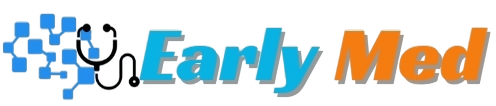